In [1]:
import textwrap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy
from matplotlib import pyplot, transforms
from matplotlib.text import OffsetFrom
from matplotlib.lines import Line2D
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
from functools import reduce
import plotly.express as px

In [2]:
df = pd.read_csv('./data/kaggle_survey_2022_responses.csv', skiprows=[0])

/var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/ipykernel_18506/2989873918.py:1: DtypeWarning: Columns (208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/kaggle_survey_2022_responses.csv', skiprows=[0])


In [3]:
col_mapping = pd.read_csv('./data/column_mapping.csv')

In [4]:
col_mapping_dict = {k:v for k, v in col_mapping.dropna().values}

In [5]:
df = df[col_mapping_dict.keys()].rename(columns=col_mapping_dict)

In [6]:
df

,age,gender,country,student,education_level,published,ml_used_theoretical,ml_used_applied,ml_used_no,code_exp,...,cloud_platform_GoogleCloudPlatform(GCP),cloud_platform_IBMCloud/RedHat,cloud_platform_OracleCloud,cloud_platform_SAPCloud,cloud_platform_VMwareCloud,cloud_platform_AlibabaCloud,cloud_platform_TencentCloud,cloud_platform_HuaweiCloud,cloud_platform_None,cloud_platform_Other
0,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30-34,Man,Algeria,No,Master’s degree,Yes,NaN,NaN,No,1-3 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18-21,Man,Egypt,Yes,Bachelor’s degree,NaN,NaN,NaN,NaN,1-3 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55-59,Man,France,No,Some college/university study without earning ...,NaN,NaN,NaN,NaN,10-20 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
4,45-49,Man,India,Yes,Bachelor’s degree,NaN,NaN,NaN,NaN,5-10 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,22-24,Man,United States of America,Yes,Master’s degree,No,NaN,NaN,NaN,3-5 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23993,60-69,Man,United States of America,Yes,Bachelor’s degree,NaN,NaN,NaN,NaN,20+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23994,25-29,Man,Turkey,No,Master’s degree,Yes,NaN,NaN,No,< 1 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23995,35-39,Woman,Israel,No,Doctoral degree,Yes,NaN,"Yes, the research made use of machine learning...",NaN,3-5 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.query('student == "No"')

In [8]:
#Drop the column student after filtering to focus on industry insights from professionals
df = df.drop(columns=['student'])
df

,age,gender,country,education_level,published,ml_used_theoretical,ml_used_applied,ml_used_no,code_exp,program_lang_Python,...,cloud_platform_GoogleCloudPlatform(GCP),cloud_platform_IBMCloud/RedHat,cloud_platform_OracleCloud,cloud_platform_SAPCloud,cloud_platform_VMwareCloud,cloud_platform_AlibabaCloud,cloud_platform_TencentCloud,cloud_platform_HuaweiCloud,cloud_platform_None,cloud_platform_Other
0,30-34,Man,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30-34,Man,Algeria,Master’s degree,Yes,NaN,NaN,No,1-3 years,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55-59,Man,France,Some college/university study without earning ...,NaN,NaN,NaN,NaN,10-20 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
7,30-34,Man,Germany,Bachelor’s degree,NaN,NaN,NaN,NaN,10-20 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,70+,Man,Australia,Doctoral degree,Yes,NaN,"Yes, the research made use of machine learning...",NaN,20+ years,Python,...,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23984,40-44,Man,United States of America,Master’s degree,No,NaN,NaN,NaN,10-20 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23989,35-39,Man,India,Master’s degree,No,NaN,NaN,NaN,1-3 years,Python,...,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23990,40-44,Man,India,Bachelor’s degree,NaN,NaN,NaN,NaN,1-3 years,Python,...,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23994,25-29,Man,Turkey,Master’s degree,Yes,NaN,NaN,No,< 1 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df['title'].unique()

array([nan, 'Data Scientist', 'Software Engineer', 'Research Scientist',
       'Other', 'Developer Advocate',
       'Data Analyst (Business, Marketing, Financial, Quantitative, etc)',
       'Data Engineer', 'Currently not employed',
       'Machine Learning/ MLops Engineer', 'Engineer (non-software)',
       'Teacher / professor', 'Statistician',
       'Manager (Program, Project, Operations, Executive-level, etc)',
       'Data Administrator', 'Data Architect'], dtype=object)

In [10]:
df = df.query('title.notna() and title != "Currently not employed"')


In [11]:
df['title'].unique()

array(['Data Scientist', 'Software Engineer', 'Research Scientist',
       'Other', 'Developer Advocate',
       'Data Analyst (Business, Marketing, Financial, Quantitative, etc)',
       'Data Engineer', 'Machine Learning/ MLops Engineer',
       'Engineer (non-software)', 'Teacher / professor', 'Statistician',
       'Manager (Program, Project, Operations, Executive-level, etc)',
       'Data Administrator', 'Data Architect'], dtype=object)

In [12]:
df

,age,gender,country,education_level,published,ml_used_theoretical,ml_used_applied,ml_used_no,code_exp,program_lang_Python,...,cloud_platform_GoogleCloudPlatform(GCP),cloud_platform_IBMCloud/RedHat,cloud_platform_OracleCloud,cloud_platform_SAPCloud,cloud_platform_VMwareCloud,cloud_platform_AlibabaCloud,cloud_platform_TencentCloud,cloud_platform_HuaweiCloud,cloud_platform_None,cloud_platform_Other
3,55-59,Man,France,Some college/university study without earning ...,NaN,NaN,NaN,NaN,10-20 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
7,30-34,Man,Germany,Bachelor’s degree,NaN,NaN,NaN,NaN,10-20 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,70+,Man,Australia,Doctoral degree,Yes,NaN,"Yes, the research made use of machine learning...",NaN,20+ years,Python,...,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,55-59,Man,South Korea,Master’s degree,No,NaN,NaN,NaN,1-3 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,40-44,Man,United States of America,Doctoral degree,Yes,"Yes, the research made advances related to som...",NaN,NaN,10-20 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23984,40-44,Man,United States of America,Master’s degree,No,NaN,NaN,NaN,10-20 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23989,35-39,Man,India,Master’s degree,No,NaN,NaN,NaN,1-3 years,Python,...,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23990,40-44,Man,India,Bachelor’s degree,NaN,NaN,NaN,NaN,1-3 years,Python,...,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23994,25-29,Man,Turkey,Master’s degree,Yes,NaN,NaN,No,< 1 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df = df.query('industry.notna()')
df

,age,gender,country,education_level,published,ml_used_theoretical,ml_used_applied,ml_used_no,code_exp,program_lang_Python,...,cloud_platform_GoogleCloudPlatform(GCP),cloud_platform_IBMCloud/RedHat,cloud_platform_OracleCloud,cloud_platform_SAPCloud,cloud_platform_VMwareCloud,cloud_platform_AlibabaCloud,cloud_platform_TencentCloud,cloud_platform_HuaweiCloud,cloud_platform_None,cloud_platform_Other
3,55-59,Man,France,Some college/university study without earning ...,NaN,NaN,NaN,NaN,10-20 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
7,30-34,Man,Germany,Bachelor’s degree,NaN,NaN,NaN,NaN,10-20 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,70+,Man,Australia,Doctoral degree,Yes,NaN,"Yes, the research made use of machine learning...",NaN,20+ years,Python,...,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,55-59,Man,South Korea,Master’s degree,No,NaN,NaN,NaN,1-3 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,40-44,Man,United States of America,Doctoral degree,Yes,"Yes, the research made advances related to som...",NaN,NaN,10-20 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23984,40-44,Man,United States of America,Master’s degree,No,NaN,NaN,NaN,10-20 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23989,35-39,Man,India,Master’s degree,No,NaN,NaN,NaN,1-3 years,Python,...,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23990,40-44,Man,India,Bachelor’s degree,NaN,NaN,NaN,NaN,1-3 years,Python,...,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23994,25-29,Man,Turkey,Master’s degree,Yes,NaN,NaN,No,< 1 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Plotting the proportions of country 
num_country = df['country'].value_counts()
num_country = num_country.reset_index()
num_country


,index,country
0,India,2678
1,United States of America,1586
2,Other,579
3,Japan,370
4,Brazil,315
5,Nigeria,168
6,France,160
7,United Kingdom of Great Britain and Northern I...,150
8,Spain,150
9,Mexico,149


## 1. Gender & Title distribution in different industries

In [15]:
position = df['title'].value_counts()
position = position.reset_index()
position

,index,title
0,Data Scientist,1913
1,"Data Analyst (Business, Marketing, Financial, ...",1513
2,Software Engineer,971
3,"Manager (Program, Project, Operations, Executi...",826
4,Teacher / professor,820
5,Other,748
6,Research Scientist,590
7,Machine Learning/ MLops Engineer,562
8,Engineer (non-software),463
9,Data Engineer,341


In [16]:
position['Group'] = position['index'].where(position['title'] > 100, 'Other')
position

,index,title,Group
0,Data Scientist,1913,Data Scientist
1,"Data Analyst (Business, Marketing, Financial, ...",1513,"Data Analyst (Business, Marketing, Financial, ..."
2,Software Engineer,971,Software Engineer
3,"Manager (Program, Project, Operations, Executi...",826,"Manager (Program, Project, Operations, Executi..."
4,Teacher / professor,820,Teacher / professor
5,Other,748,Other
6,Research Scientist,590,Research Scientist
7,Machine Learning/ MLops Engineer,562,Machine Learning/ MLops Engineer
8,Engineer (non-software),463,Engineer (non-software)
9,Data Engineer,341,Data Engineer


In [17]:
group_position = position.groupby('Group')['title'].sum().reset_index().sort_values(by='title', ascending=False)
group_position



,Group,title
2,Data Scientist,1913
0,"Data Analyst (Business, Marketing, Financial, ...",1513
6,Other,972
8,Software Engineer,971
5,"Manager (Program, Project, Operations, Executi...",826
10,Teacher / professor,820
7,Research Scientist,590
4,Machine Learning/ MLops Engineer,562
3,Engineer (non-software),463
1,Data Engineer,341


In [18]:
df['count'] = 1

/var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/ipykernel_18506/1365709263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count'] = 1


In [19]:
position_order = df['title'].unique().tolist()
position_order

['Data Scientist',
 'Software Engineer',
 'Research Scientist',
 'Other',
 'Developer Advocate',
 'Data Analyst (Business, Marketing, Financial, Quantitative, etc)',
 'Data Engineer',
 'Machine Learning/ MLops Engineer',
 'Engineer (non-software)',
 'Teacher / professor',
 'Statistician',
 'Manager (Program, Project, Operations, Executive-level, etc)',
 'Data Administrator',
 'Data Architect']

In [20]:
industry_order = df['industry'].unique().tolist()
industry_order

['Online Service/Internet-based Services',
 'Insurance/Risk Assessment',
 'Government/Public Service',
 'Manufacturing/Fabrication',
 'Computers/Technology',
 'Accounting/Finance',
 'Academics/Education',
 'Non-profit/Service',
 'Other',
 'Medical/Pharmaceutical',
 'Marketing/CRM',
 'Energy/Mining',
 'Broadcasting/Communications',
 'Retail/Sales',
 'Shipping/Transportation']

In [21]:
data_q5q15 = pd.pivot_table(df, values='count', index=['title'], columns=['industry'], aggfunc=np.sum).fillna(0).astype(int).loc[position_order, industry_order].stack()
data_q5q15_man = pd.pivot_table(df[df['gender']=='Man'], values='count', index=['title'], columns=['industry'], aggfunc=np.sum).fillna(0).astype(int).loc[position_order, industry_order].stack()
data_q5q15_woman = pd.pivot_table(df[df['gender']=='Woman'], values='count', index=['title'], columns=['industry'], aggfunc=np.sum).fillna(0).astype(int).loc[position_order, industry_order].stack()

In [22]:
def drawPieMarker(xs, ys, ratios, sizes, colors, ax):
    markers = []
    previous = 0
    # calculate the points of the pie pieces
    for color, ratio in zip(colors, ratios):
        this = 2 * np.pi * ratio + previous
        x  = [0] + np.cos(np.linspace(previous, this, 30)).tolist() + [0]
        y  = [0] + np.sin(np.linspace(previous, this, 30)).tolist() + [0]
        xy = np.column_stack([x, y])
        previous = this
        markers.append({'marker':xy, 's':np.abs(xy).max()**2*np.array(sizes), 'facecolor':color})

    # scatter each of the pie pieces to create pies
    for marker in markers:
        ax.scatter(xs, ys, **marker, alpha=0.7)

In [23]:
# Define function for marker
# def count_to_size(val):
#     max_sz = 20
#     min_sz = 3
#     return np.sqrt((val - 1) / (80 - 1)) * (max_sz - min_sz) + min_sz

/var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/ipykernel_18506/3813568567.py:12: RuntimeWarning: invalid value encountered in long_scalars
  drawPieMarker([q15_idx],[q5_idx], [man/(man+woman), woman/(man+woman)], [tot*7], ['#004c70', '#990000'], ax=ax_plot)
/var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/ipykernel_18506/3813568567.py:12: RuntimeWarning: invalid value encountered in long_scalars
  drawPieMarker([q15_idx],[q5_idx], [man/(man+woman), woman/(man+woman)], [tot*7], ['#004c70', '#990000'], ax=ax_plot)
/var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/ipykernel_18506/3813568567.py:12: RuntimeWarning: invalid value encountered in long_scalars
  drawPieMarker([q15_idx],[q5_idx], [man/(man+woman), woman/(man+woman)], [tot*7], ['#004c70', '#990000'], ax=ax_plot)
/var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/ipykernel_18506/3813568567.py:12: RuntimeWarning: invalid value encountered in long_scalars
  drawPieMarker([q15_idx],[q5_idx], [man/(man+woman), woman/(man+woman)], [tot*

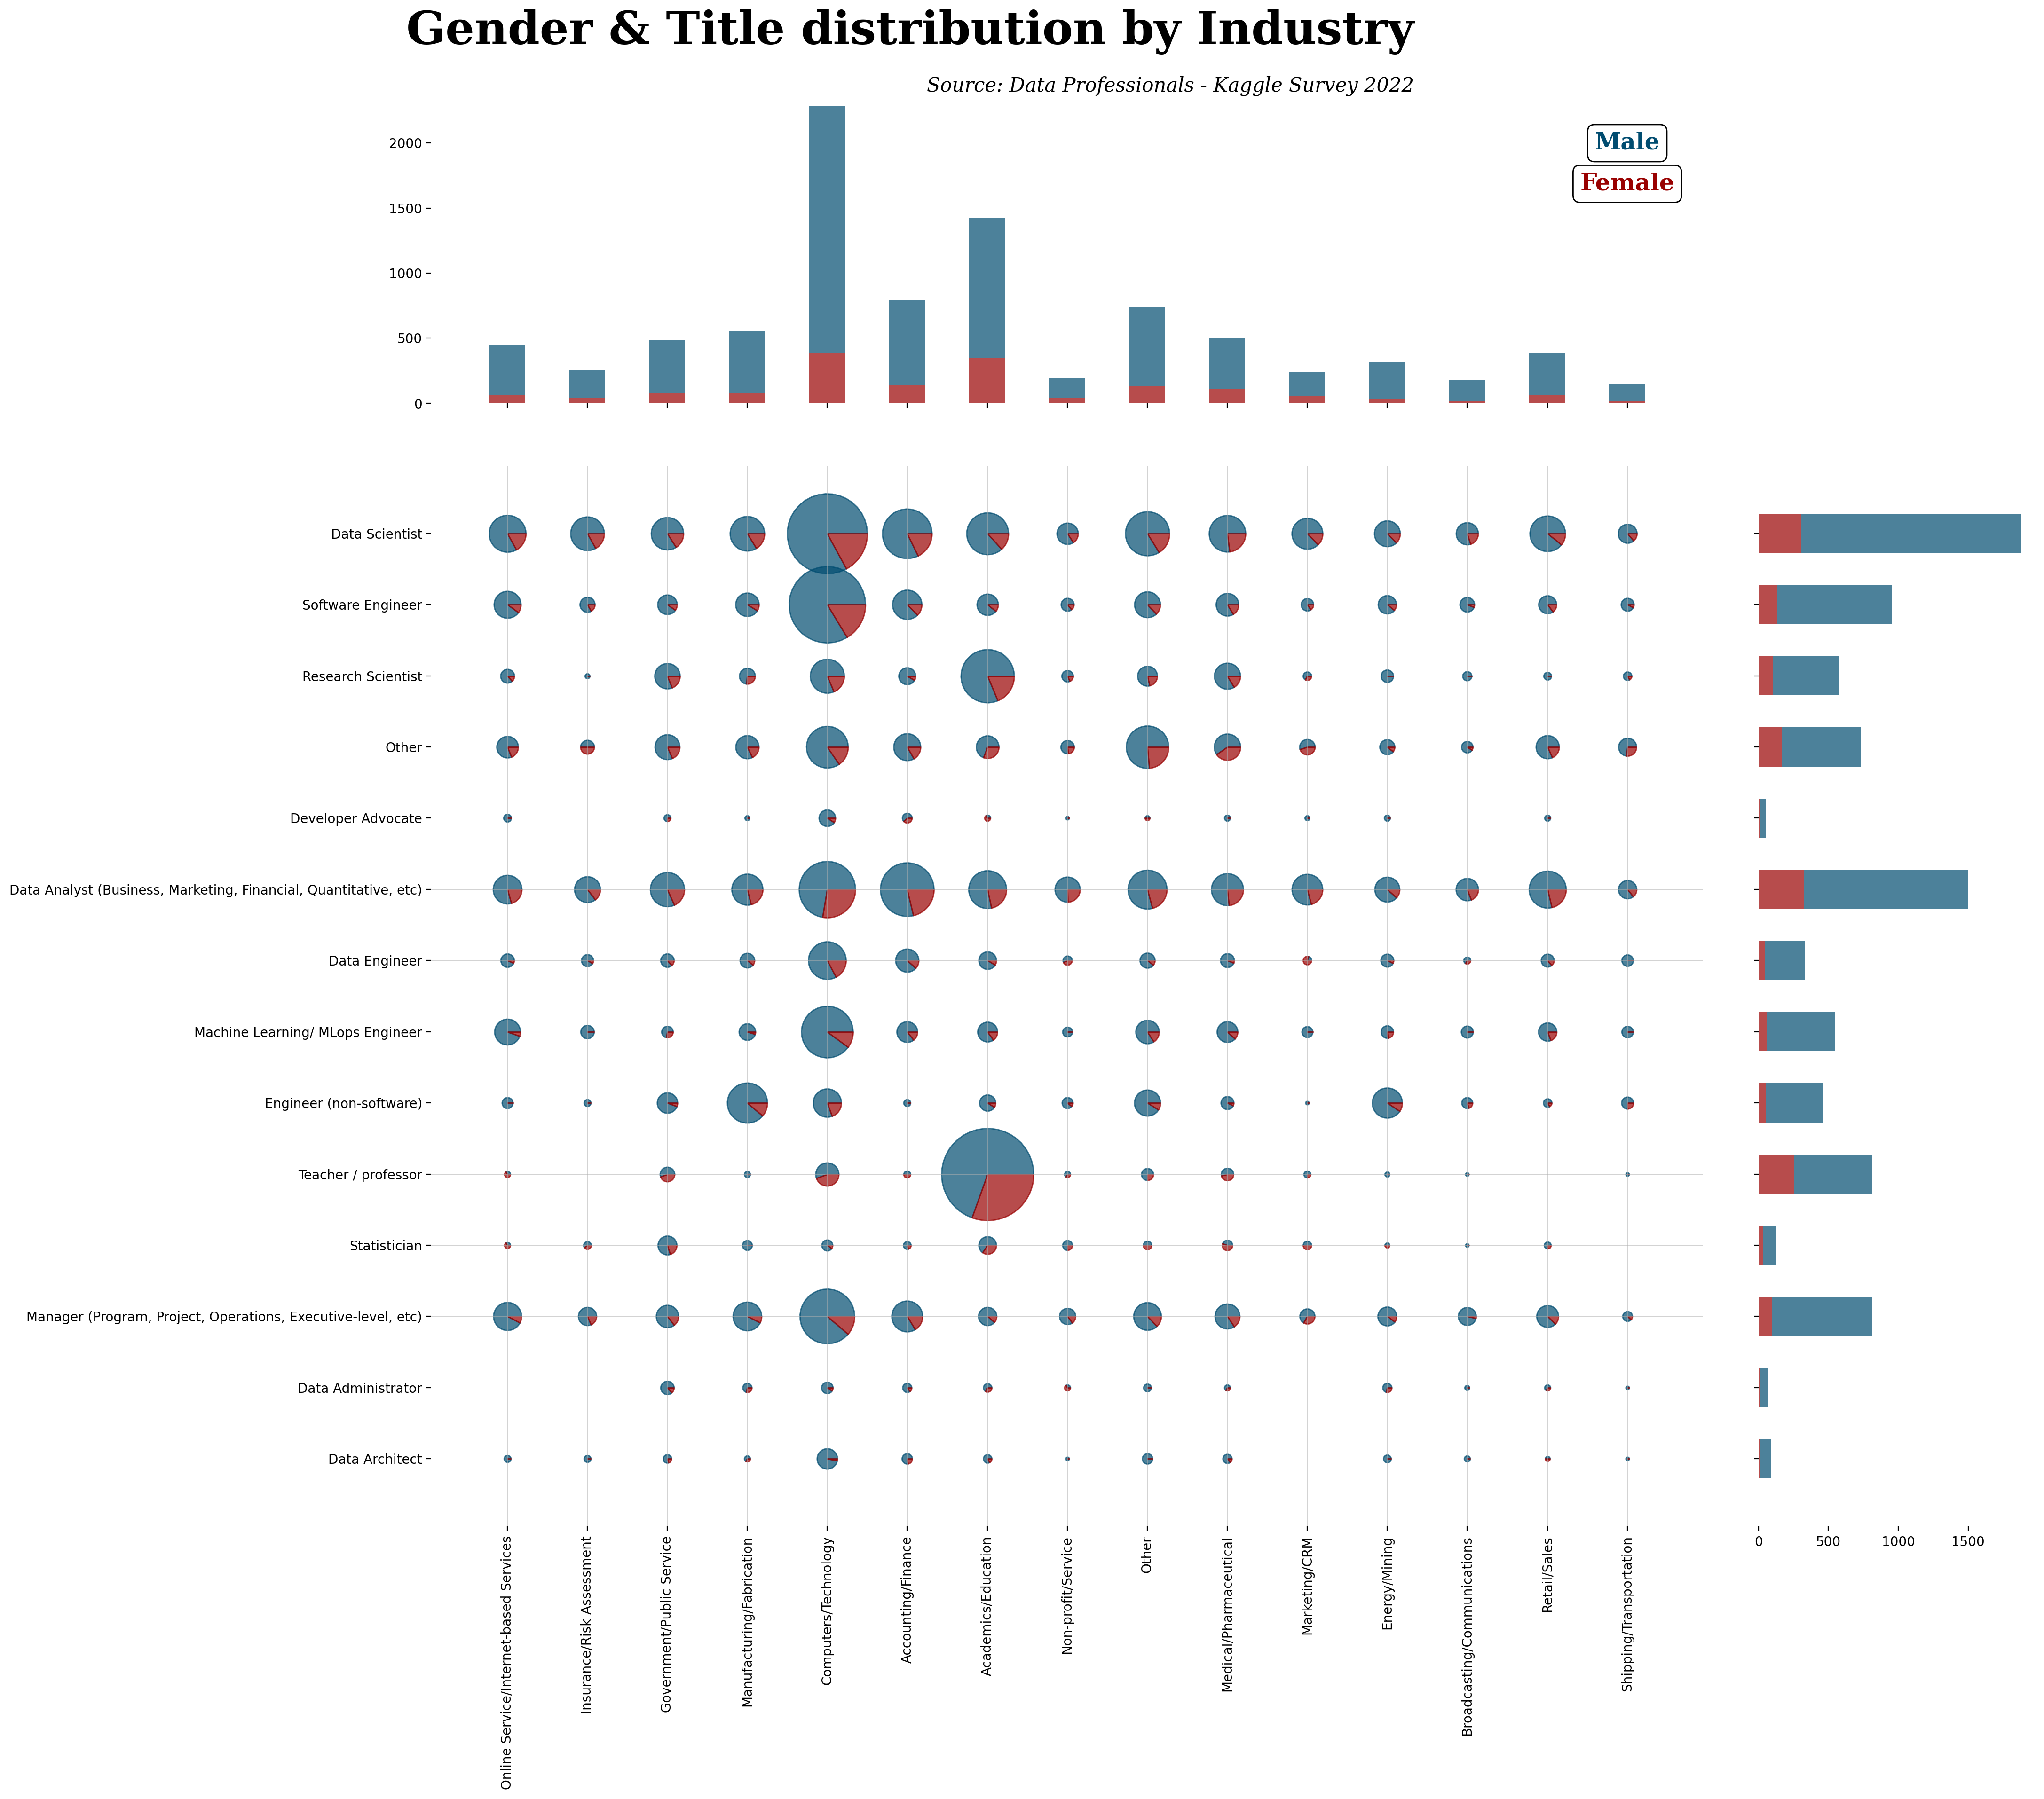

In [24]:
fig = plt.figure(figsize=(22, 25), dpi=200)

gs = fig.add_gridspec(5, 5)


ax_plot = fig.add_subplot(gs[1:4, 0:4]) 
for q5_idx in position_order[::-1]:
    for q15_idx in industry_order:
        man = data_q5q15_man[q5_idx][q15_idx]
        woman = data_q5q15_woman[q5_idx][q15_idx]
        tot = data_q5q15[q5_idx][q15_idx]
        drawPieMarker([q15_idx],[q5_idx], [man/(man+woman), woman/(man+woman)], [tot*7], ['#004c70', '#990000'], ax=ax_plot)

ax_plot.grid(linewidth=0.2, zorder=0)        

ax_plot.tick_params(axis='x', labelrotation=90)

# Industry
ax_int = fig.add_subplot(gs[0, :4], sharex=ax_plot) 
data_q15_woman = df[df['gender']=='Woman']['industry'].value_counts()[industry_order]
ax_int.bar(data_q15_woman.index, data_q15_woman, width=0.45, alpha=0.7, color='#990000')

data_q15_man = df[df['gender']=='Man']['industry'].value_counts()[industry_order]
ax_int.bar(data_q15_man.index, data_q15_man, bottom=data_q15_woman , width=0.45, alpha=0.7, color='#004c70')

plt.setp(ax_int.get_xticklabels(), visible=False)


# Title
ax_tit = fig.add_subplot(gs[1:4, 4], sharey=ax_plot) 

data_q5_woman = df[df['gender']=='Woman']['title'].value_counts()[position_order]
ax_tit.barh(data_q5_woman.index[::-1], data_q5_woman[::-1], height=0.55, alpha=0.7, color='#990000')

data_q5_man = df[df['gender']=='Man']['title'].value_counts()[position_order]
ax_tit.barh(data_q5_man.index[::-1], data_q5_man[::-1], left= data_q5_woman[::-1],height=0.55, alpha=0.7, color='#004c70')

plt.setp(ax_tit.get_yticklabels(), visible=False)

# Spines
for s in ['top', 'left', 'right', 'bottom']:
    ax_plot.spines[s].set_visible(False)
    ax_int.spines[s].set_visible(False)
    ax_tit.spines[s].set_visible(False)
    

fig.text(0.6, 0.9, 'Gender & Title distribution by Industry', fontweight='bold', fontfamily='serif', fontsize=35, ha='right') 
fig.text(0.6, 0.88, 'Source: Data Professionals - Kaggle Survey 2022', fontweight='light', style= 'italic', fontfamily='serif', fontsize=15, ha='right')


an1 = ax_int.annotate("Male", xy=(14, 2000), xycoords="data",
                  va="center", ha="center",
                  fontweight = 'bold', fontfamily='serif', fontsize=18,
                  bbox=dict(boxstyle="round", fc="w"), color='#004c70')

offset_from = OffsetFrom(an1, (0.5, -0.2))
an2 = ax_int.annotate("Female", xy=(0.1, 0.1), xycoords="data",
                  xytext=(0, -10), textcoords=offset_from,
                  # xytext is offset points from "xy=(0.5, 0), xycoords=an1"
                  va="top", ha="center", color='#990000',
                  fontweight = 'bold', fontfamily='serif',
                  fontsize=18,
                  bbox=dict(boxstyle="round", fc="w"))
                  
# # legend for marker size
# plt.text(5,10, "Count of Professionals", fontname="Sans Serif", fontsize=8, ha="center")
# marker_x = [10.6, 11, 11.4, 11.9]
# marker_count = [1, 100, 200, 500]
# marker_size = count_to_size(np.array(marker_count))
# for i in range(len(marker_x)):
#     plt.plot(marker_x[i], 54, markersize=marker_size[i], marker="o", color="#4d4d4d")
#     plt.text(marker_x[i], 49, str(marker_count[i]), ha="center", fontsize=8, color="#4d4d4d")
# ax_int.add_patch(plt.Rectangle((5,12), 2, 110, fill=False))

plt.show()



## 2. Education levels in different titles

In [25]:
df = df.query('education_level.notna() and education_level != "I prefer not to answer"')
df['education_level'].unique()


array(['Some college/university study without earning a bachelor’s degree',
       'Bachelor’s degree', 'Doctoral degree', 'Master’s degree',
       'No formal education past high school', 'Professional doctorate'],
      dtype=object)

In [29]:
df['edu_group'] = df['education_level'].where(
    ~df['education_level'].isin(["No formal education past high school", "Some college/university study without earning a bachelor’s degree"]), "Below Bachelor's Degree"
    )

/var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/ipykernel_18506/106836538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['edu_group'] = df['education_level'].where(


In [30]:
df['edu_group'] = df['education_level'].where(
    ~df['education_level'].isin(["Professional doctorate", "Doctoral degree"]), "Above Master's Degree"
    )

/var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/ipykernel_18506/2800693576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['edu_group'] = df['education_level'].where(


In [31]:
df['edu_group'].unique()

array(['Some college/university study without earning a bachelor’s degree',
       'Bachelor’s degree', "Above Master's Degree", 'Master’s degree',
       'No formal education past high school'], dtype=object)

In [ ]:
fig = px.parallel_coordinates(df, color="species_id",
                              dimensions=['sepal_width', 'sepal_length', 'petal_width',
                                          'petal_length'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()